---
## **Implement a contour detection algorithm (15 points)**

**Apply the contour detection algorithm to the same image dataset.**

**Visualize the detected contours on the original images, marking each contour with a
different color.**


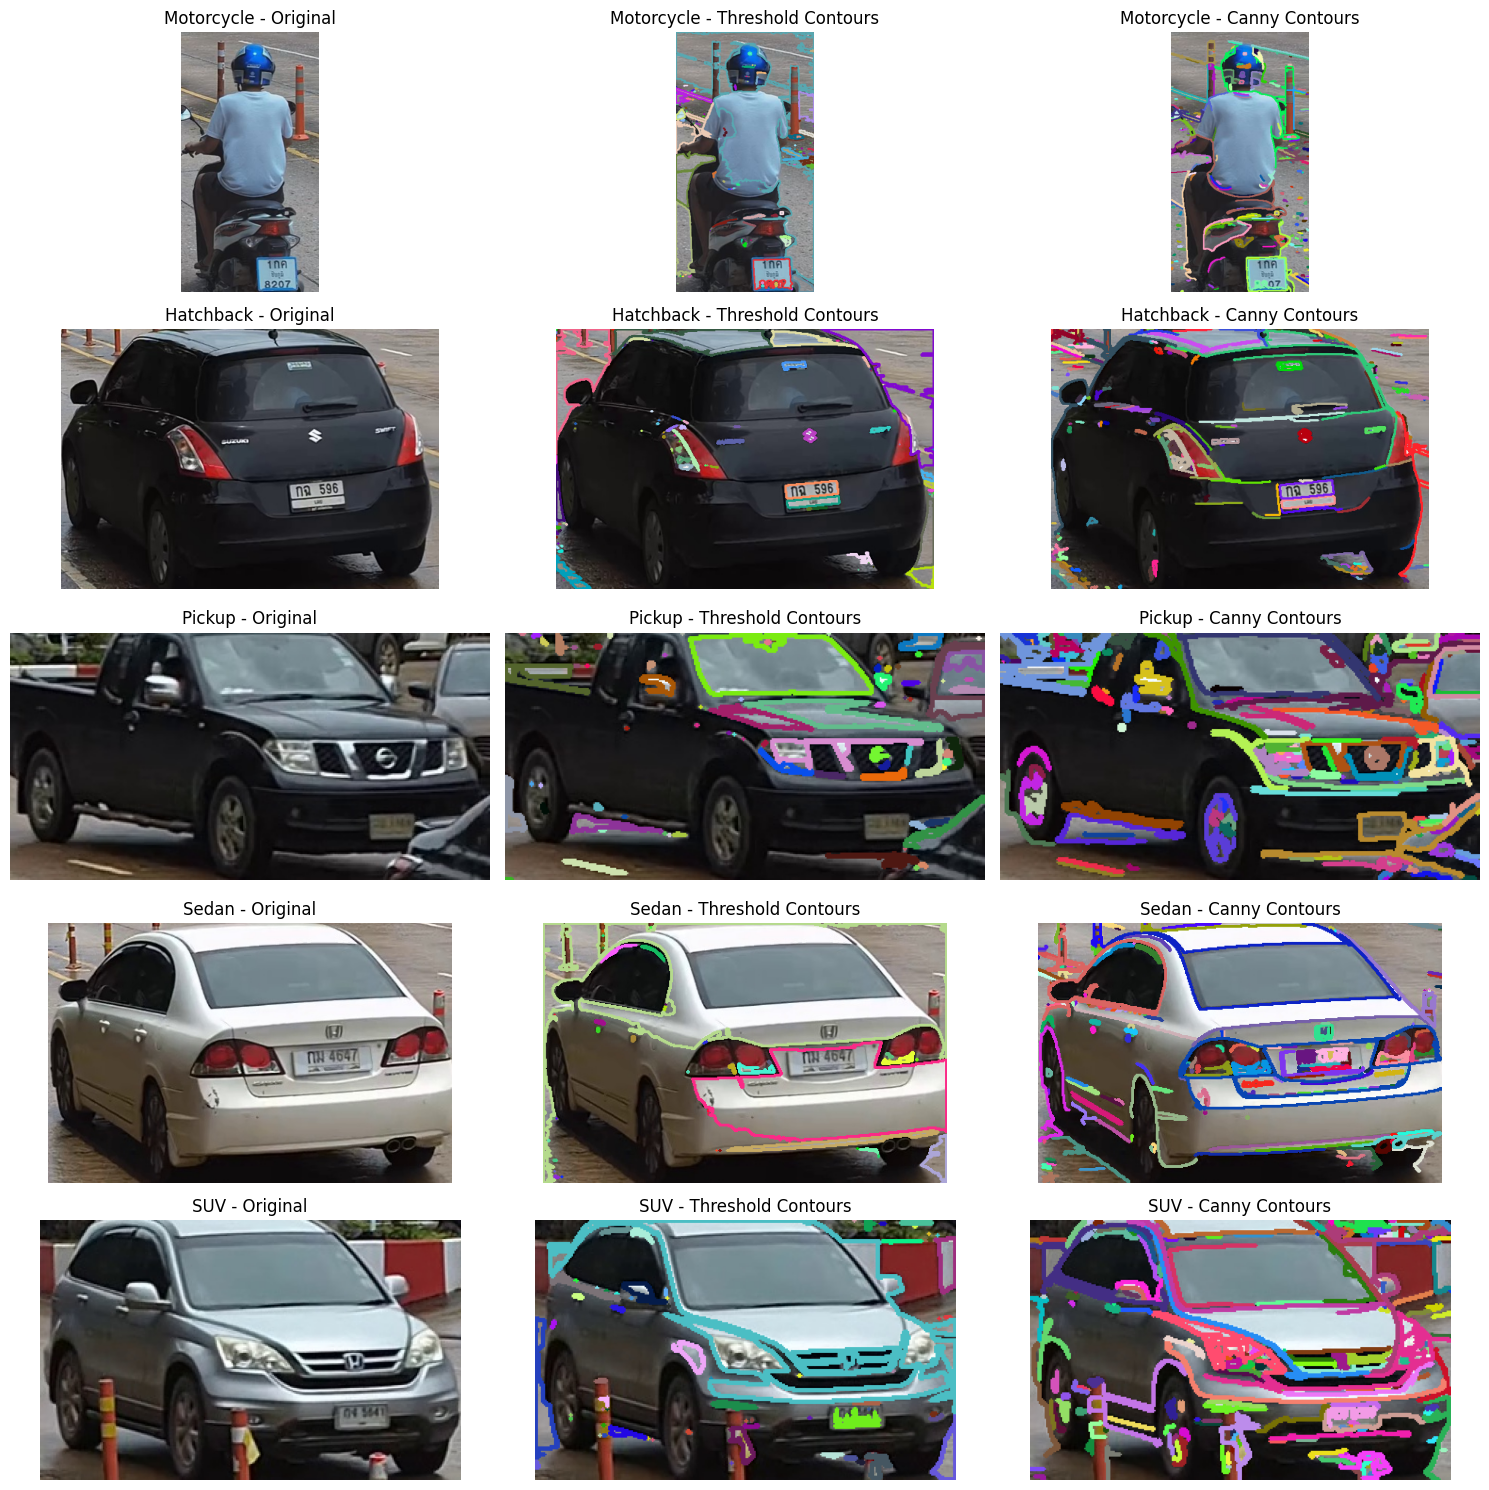

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Apply thresholding
_, thresh_motorcycle = cv2.threshold(gray_motorcycle, 127, 255, cv2.THRESH_BINARY)
_, thresh_hatchback = cv2.threshold(gray_hatchback, 127, 255, cv2.THRESH_BINARY)
_, thresh_pickup = cv2.threshold(gray_pickup, 127, 255, cv2.THRESH_BINARY)
_, thresh_sedan = cv2.threshold(gray_sedan, 127, 255, cv2.THRESH_BINARY)
_, thresh_suv = cv2.threshold(gray_suv, 127, 255, cv2.THRESH_BINARY)

# Store threshold images in a list
thresh_images = [
    thresh_motorcycle,
    thresh_hatchback,
    thresh_pickup,
    thresh_sedan,
    thresh_suv,
]


# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]


# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(5, 3, figsize=(15, 15))

for i in range(5):
    # Show original image
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(titles[i] + " - Original")
    axes[i, 0].axis("off")

    # Show thresholded image with contours
    axes[i, 1].imshow(cv2.cvtColor(contour_images_thresh[i], cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(titles[i] + " - Threshold Contours")
    axes[i, 1].axis("off")

    # Show Canny edge image with contours
    axes[i, 2].imshow(cv2.cvtColor(contour_images_canny[i], cv2.COLOR_BGR2RGB))
    axes[i, 2].set_title(titles[i] + " - Canny Contours")
    axes[i, 2].axis("off")

# Display the plots
plt.tight_layout()
plt.show()

**Calculate and display relevant statistics for each image, such as the number of contours
detected, contour area, and perimeter.**

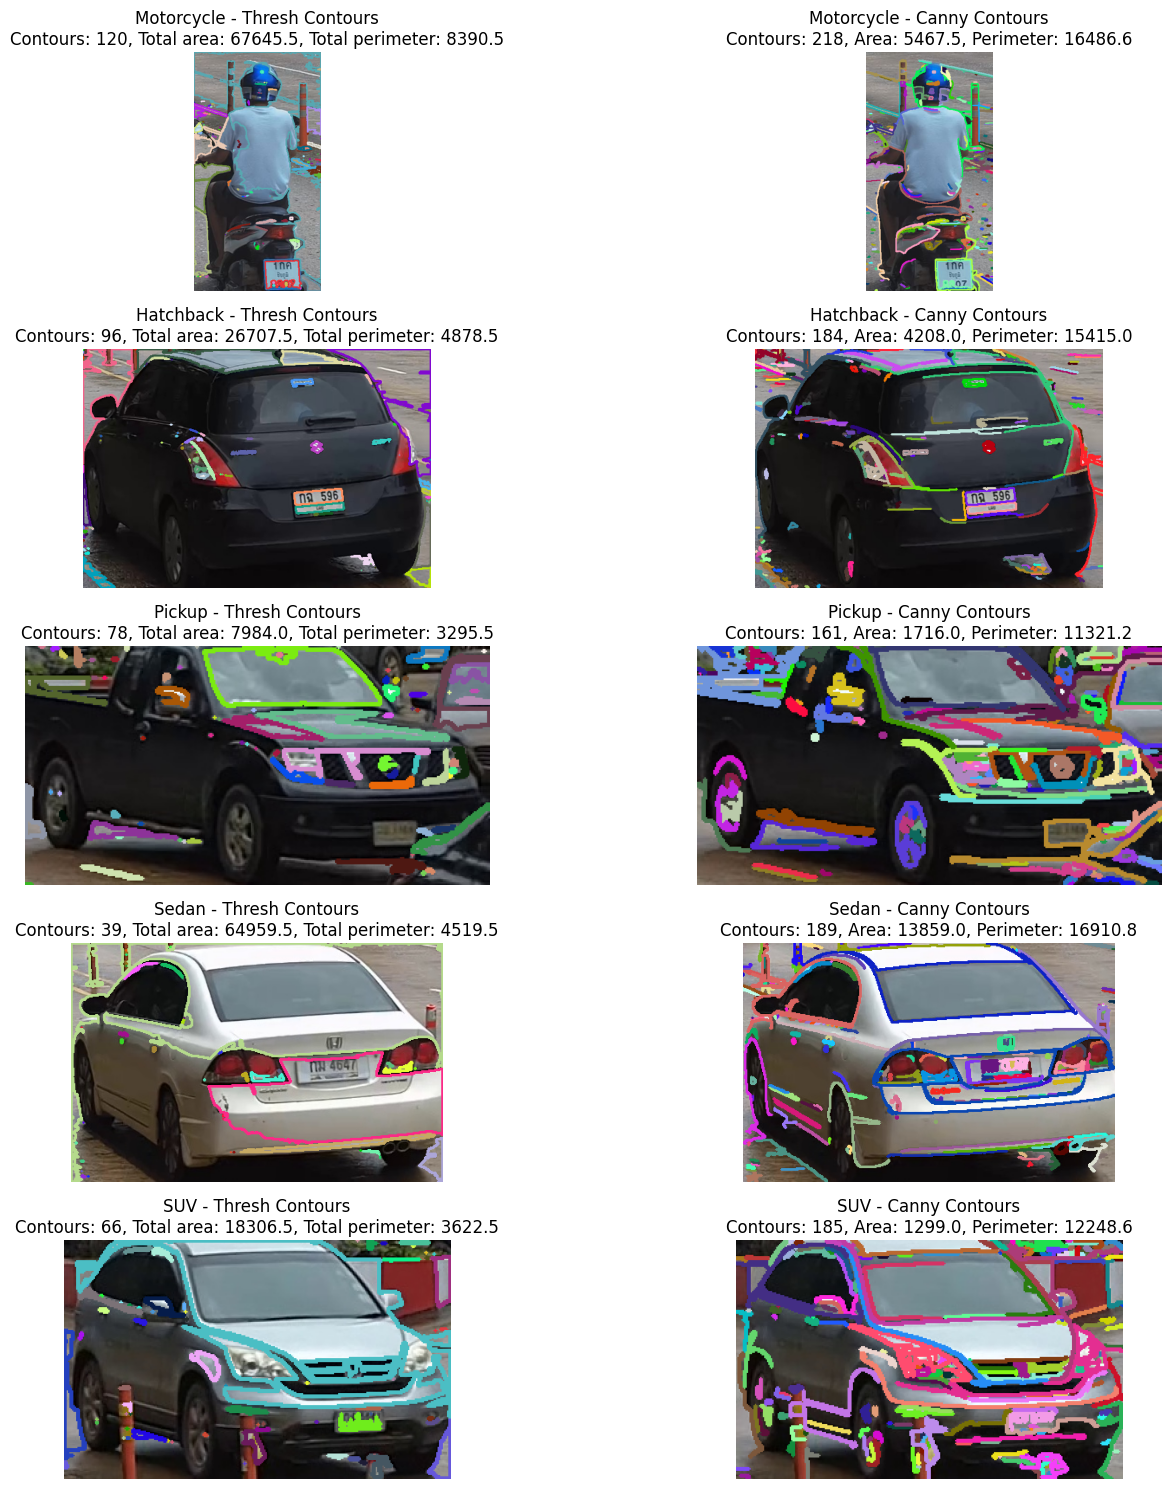

In [16]:
# Create lists to store the statistics
contour_stats_thresh = []
contour_stats_canny = []


# Helper function to compute contour statistics
def compute_contour_stats(contours):
    num_contours = len(contours)
    total_area = sum(cv2.contourArea(contour) for contour in contours)
    total_perimeter = sum(cv2.arcLength(contour, True) for contour in contours)
    return num_contours, total_area, total_perimeter


# Compute statistics for thresholded images
for i in range(5):
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    stats_thresh = compute_contour_stats(contours_thresh)
    contour_stats_thresh.append(stats_thresh)

# Compute statistics for Canny edge images
for i in range(5):
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    stats_canny = compute_contour_stats(contours_canny)
    contour_stats_canny.append(stats_canny)

# Visualize results and display statistics

fig, axes = plt.subplots(5, 2, figsize=(15, 15))

for i in range(5):
    # Show original image
    # axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    # axes[i, 0].set_title(f"{titles[i]} - Original")
    # axes[i, 0].axis("off")

    # Show thresholded image with contours
    axes[i, 0].imshow(cv2.cvtColor(contour_images_thresh[i], cv2.COLOR_BGR2RGB))
    num_thresh, area_thresh, perimeter_thresh = contour_stats_thresh[i]
    axes[i, 0].set_title(
        f"{titles[i]} - Thresh Contours\nContours: {num_thresh}, Total area: {area_thresh:.1f}, Total perimeter: {perimeter_thresh:.1f}"
    )
    axes[i, 0].axis("off")

    # Show Canny edge image with contours
    axes[i, 1].imshow(cv2.cvtColor(contour_images_canny[i], cv2.COLOR_BGR2RGB))
    num_canny, area_canny, perimeter_canny = contour_stats_canny[i]
    axes[i, 1].set_title(
        f"{titles[i]} - Canny Contours\nContours: {num_canny}, Area: {area_canny:.1f}, Perimeter: {perimeter_canny:.1f}"
    )
    axes[i, 1].axis("off")

# Display the plots
plt.tight_layout()
plt.show()

**Compare the results of blob detection and contour detection for the chosen dataset.**



**Discuss the advantages and limitations of each technique.**

**Analyze the impact of different parameters (e.g., threshold values, filter sizes) on the
detection results**

In [18]:
# New threshold values for binary thresholding
threshold_values = [50, 127, 200]

# New parameters for Canny edge detection
canny_params = [(50, 150), (100, 200)]  # (low_threshold, high_threshold)

# Kernel sizes for Gaussian blur
kernel_sizes = [3, 5, 7]

# Create dictionaries to store statistics for different parameters
thresh_stats_by_value = {}
canny_stats_by_params = {}
canny_stats_by_blur = {}


# Function to apply threshold and get statistics
def apply_threshold_and_compute_stats(image, thresh_value):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(
        thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), thresh_image


# Function to apply Canny and get statistics
def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=3):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(
        canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), canny_image


# Analyze the effect of different threshold values
for i, img in enumerate(gray_images):
    stats_for_thresholds = []
    for thresh_value in threshold_values:
        stats, thresh_image = apply_threshold_and_compute_stats(img, thresh_value)
        stats_for_thresholds.append(stats)
    thresh_stats_by_value[titles[i]] = stats_for_thresholds

# Analyze the effect of different Canny thresholds
for i, img in enumerate(gray_images):
    stats_for_canny = []
    for low_thresh, high_thresh in canny_params:
        stats, canny_image = apply_canny_and_compute_stats(img, low_thresh, high_thresh)
        stats_for_canny.append(stats)
    canny_stats_by_params[titles[i]] = stats_for_canny

# Analyze the effect of different Gaussian blur kernel sizes
for i, img in enumerate(gray_images):
    stats_for_blur = []
    for kernel_size in kernel_sizes:
        stats, canny_image = apply_canny_and_compute_stats(
            img, 100, 200, kernel_size=kernel_size
        )
        stats_for_blur.append(stats)
    canny_stats_by_blur[titles[i]] = stats_for_blur

# Display results
for i, title in enumerate(titles):
    print(f"Analysis for {title}:")

    # Threshold value impact
    print("  Threshold Values Impact:")
    for j, thresh_value in enumerate(threshold_values):
        num, area, perimeter = thresh_stats_by_value[title][j]
        print(
            f"    Threshold {thresh_value}: Contours = {num}, Area = {area:.2f}, Perimeter = {perimeter:.2f}"
        )

    # Canny threshold impact
    print("  Canny Threshold Values Impact:")
    for j, (low_thresh, high_thresh) in enumerate(canny_params):
        num, area, perimeter = canny_stats_by_params[title][j]
        print(
            f"    Canny (low={low_thresh}, high={high_thresh}): Contours = {num}, Area = {area:.2f}, Perimeter = {perimeter:.2f}"
        )

    # Gaussian kernel size impact
    print("  Canny Gaussian Blur Kernel Size Impact:")
    for j, kernel_size in enumerate(kernel_sizes):
        num, area, perimeter = canny_stats_by_blur[title][j]
        print(
            f"    Kernel Size {kernel_size}: Contours = {num}, Area = {area:.2f}, Perimeter = {perimeter:.2f}"
        )

    print("\n")

Analysis for Motorcycle:
  Threshold Values Impact:
    Threshold 50: Contours = 48, Area = 109679.00, Perimeter = 4901.16
    Threshold 127: Contours = 120, Area = 67645.50, Perimeter = 8390.49
    Threshold 200: Contours = 43, Area = 720.00, Perimeter = 868.36
  Canny Threshold Values Impact:
    Canny (low=50, high=150): Contours = 138, Area = 2998.00, Perimeter = 17344.52
    Canny (low=100, high=200): Contours = 101, Area = 2082.50, Perimeter = 12903.74
  Canny Gaussian Blur Kernel Size Impact:
    Kernel Size 3: Contours = 101, Area = 2082.50, Perimeter = 12903.74
    Kernel Size 5: Contours = 78, Area = 1474.00, Perimeter = 10520.71
    Kernel Size 7: Contours = 53, Area = 1166.00, Perimeter = 7880.04


Analysis for Hatchback:
  Threshold Values Impact:
    Threshold 50: Contours = 134, Area = 69087.00, Perimeter = 7321.64
    Threshold 127: Contours = 96, Area = 26707.50, Perimeter = 4878.48
    Threshold 200: Contours = 91, Area = 306.50, Perimeter = 881.63
  Canny Threshold V

**Provide examples where one technique might be more suitable than the other.**

## **Testing av forskjellige contour algoritmer**

In [8]:
import os
import cv2

# Define folder paths (update these with actual folder paths)
folder_paths = [
    "../data/vehicles/r7bthvstxw-1/hatchback",
    "../data/vehicles/r7bthvstxw-1/motorcycle",
    "../data/vehicles/r7bthvstxw-1/pickup",
    "../data/vehicles/r7bthvstxw-1/sedan",
    "../data/vehicles/r7bthvstxw-1/suv",
]

# New threshold values for binary thresholding
threshold_values = [50, 127, 155]

# New parameters for Canny edge detection
canny_params = [(50, 150), (100, 200)]  # (low_threshold, high_threshold)

# Kernel sizes for Gaussian blur
kernel_sizes = [3, 5, 7]

# Initialize dictionaries to store accumulated statistics for different parameters
thresh_stats_by_value = {thresh_value: [0, 0, 0] for thresh_value in threshold_values}
canny_stats_by_params = {params: [0, 0, 0] for params in canny_params}
canny_stats_by_blur = {kernel_size: [0, 0, 0] for kernel_size in kernel_sizes}

# Function to compute contour statistics
def compute_contour_stats(contours):
    num_contours = len(contours)
    total_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_perimeter = sum(cv2.arcLength(cnt, True) for cnt in contours)
    return num_contours, total_area, total_perimeter

# Function to apply threshold and get statistics
def apply_threshold_and_compute_stats(image, thresh_value):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return compute_contour_stats(contours), thresh_image

# Function to apply Canny and get statistics
def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=3):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return compute_contour_stats(contours), canny_image

# Function to process all images in a folder and compute averages
def process_folder_and_compute_averages(folder_path):
    num_images = 0
    
    # Iterate over all images in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            num_images += 1
            
            # Threshold analysis for multiple values
            for thresh_value in threshold_values:
                thresh_stats, _ = apply_threshold_and_compute_stats(img, thresh_value)
                thresh_stats_by_value[thresh_value] = [x + y for x, y in zip(thresh_stats_by_value[thresh_value], thresh_stats)]
            
            # Canny edge detection analysis for multiple parameter sets
            for low_thresh, high_thresh in canny_params:
                canny_stats, _ = apply_canny_and_compute_stats(img, low_thresh, high_thresh)
                canny_stats_by_params[(low_thresh, high_thresh)] = [x + y for x, y in zip(canny_stats_by_params[(low_thresh, high_thresh)], canny_stats)]
            
            # Canny with Gaussian blur for different kernel sizes
            for kernel_size in kernel_sizes:
                blur_stats, _ = apply_canny_and_compute_stats(img, 100, 200, kernel_size)
                canny_stats_by_blur[kernel_size] = [x + y for x, y in zip(canny_stats_by_blur[kernel_size], blur_stats)]
    
    # Compute averages for threshold values
    for thresh_value in threshold_values:
        thresh_stats_by_value[thresh_value] = [x / num_images for x in thresh_stats_by_value[thresh_value]] if num_images > 0 else [0, 0, 0]
    
    # Compute averages for Canny parameters
    for params in canny_params:
        canny_stats_by_params[params] = [x / num_images for x in canny_stats_by_params[params]] if num_images > 0 else [0, 0, 0]
    
    # Compute averages for Gaussian blur kernel sizes
    for kernel_size in kernel_sizes:
        canny_stats_by_blur[kernel_size] = [x / num_images for x in canny_stats_by_blur[kernel_size]] if num_images > 0 else [0, 0, 0]

    return thresh_stats_by_value, canny_stats_by_params, canny_stats_by_blur

# Iterate over each folder and analyze the images
for folder_path in folder_paths:
    folder_name = os.path.basename(folder_path)
    
    # Process the folder and get averaged statistics
    thresh_stats, canny_stats, blur_stats = process_folder_and_compute_averages(folder_path)
    
    # Display average results for the current folder
    print(f"Analysis for folder {folder_name}:")

    # Threshold results
    print("  Threshold Values Impact:")
    for thresh_value in threshold_values:
        num, area, perimeter = thresh_stats[thresh_value]
        print(f"    Threshold {thresh_value}: Average Contours = {num:.2f}, Average Area = {area:.2f}, Average Perimeter = {perimeter:.2f}")

    # Canny results
    print("  Canny Threshold Values Impact:")
    for low_thresh, high_thresh in canny_params:
        num, area, perimeter = canny_stats[(low_thresh, high_thresh)]
        print(f"    Canny (low={low_thresh}, high={high_thresh}): Average Contours = {num:.2f}, Average Area = {area:.2f}, Average Perimeter = {perimeter:.2f}")

    # Gaussian blur kernel size results
    print("  Canny Gaussian Blur Kernel Size Impact:")
    for kernel_size in kernel_sizes:
        num, area, perimeter = blur_stats[kernel_size]
        print(f"    Kernel Size {kernel_size}: Average Contours = {num:.2f}, Average Area = {area:.2f}, Average Perimeter = {perimeter:.2f}")

    print("\n")


Analysis for folder hatchback:
  Threshold Values Impact:
    Threshold 50: Average Contours = 50.54, Average Area = 53335.14, Average Perimeter = 3681.76
    Threshold 127: Average Contours = 75.73, Average Area = 25707.69, Average Perimeter = 3873.60
    Threshold 155: Average Contours = 112.84, Average Area = 15347.15, Average Perimeter = 3840.92
  Canny Threshold Values Impact:
    Canny (low=50, high=150): Average Contours = 110.31, Average Area = 4683.08, Average Perimeter = 12214.13
    Canny (low=100, high=200): Average Contours = 85.97, Average Area = 3985.42, Average Perimeter = 9398.73
  Canny Gaussian Blur Kernel Size Impact:
    Kernel Size 3: Average Contours = 85.97, Average Area = 3985.42, Average Perimeter = 9398.73
    Kernel Size 5: Average Contours = 63.22, Average Area = 3445.53, Average Perimeter = 7748.94
    Kernel Size 7: Average Contours = 44.54, Average Area = 2371.74, Average Perimeter = 5787.44


Analysis for folder motorcycle:
  Threshold Values Impact:
  

In [7]:
import os
import cv2

folder_paths = [
    "../data/vehicles/r7bthvstxw-1/hatchback",  
    "../data/vehicles/r7bthvstxw-1/motorcycle",  
    "../data/vehicles/r7bthvstxw-1/pickup",  
    "../data/vehicles/r7bthvstxw-1/sedan",  
    "../data/vehicles/r7bthvstxw-1/suv",  
]

# Fixed parameters for binary thresholding and Canny edge detection
threshold_value = 127  # fixed binary threshold value
canny_low_threshold = 100  # fixed low threshold for Canny edge detection
canny_high_threshold = 200  # fixed high threshold for Canny edge detection
kernel_size = 5  # fixed Gaussian blur kernel size

# Function to apply threshold and get statistics
def apply_threshold_and_compute_stats(image, thresh_value):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(
        thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), thresh_image

# Function to apply Canny and get statistics
def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=5):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(
        canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), canny_image

# Function to compute contour statistics
def compute_contour_stats(contours):
    num_contours = len(contours)
    total_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_perimeter = sum(cv2.arcLength(cnt, True) for cnt in contours)
    return num_contours, total_area, total_perimeter

# Function to process all images in a folder and compute average stats
def process_images_in_folder(folder_path):
    num_images = 0
    total_contours = 0
    total_area = 0
    total_perimeter = 0
    
    # Load and process each image in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            num_images += 1

            # Apply thresholding and Canny edge detection, compute stats
            stats_thresh, _ = apply_threshold_and_compute_stats(img, threshold_value)
            stats_canny, _ = apply_canny_and_compute_stats(img, canny_low_threshold, canny_high_threshold, kernel_size)

            # Combine stats (you could use either thresholding or Canny stats, but here we combine them)
            num_contours = stats_thresh[0]
            area = stats_thresh[1]
            perimeter = stats_thresh[2]

            # Accumulate stats
            total_contours += num_contours
            total_area += area
            total_perimeter += perimeter

    # Compute averages
    avg_contours = total_contours / num_images if num_images > 0 else 0
    avg_area = total_area / num_images if num_images > 0 else 0
    avg_perimeter = total_perimeter / num_images if num_images > 0 else 0

    return avg_contours, avg_area, avg_perimeter

# Process each folder and print average stats
for folder_path in folder_paths:
    folder_name = os.path.basename(folder_path)
    avg_contours, avg_area, avg_perimeter = process_images_in_folder(folder_path)
    print(f"Analysis for folder {folder_name}:")
    print(f"  Average Contours = {avg_contours:.2f}")
    print(f"  Average Area = {avg_area:.2f}")
    print(f"  Average Perimeter = {avg_perimeter:.2f}")
    print("\n")


Analysis for folder hatchback:
  Average Contours = 75.73
  Average Area = 25707.69
  Average Perimeter = 3873.60


Analysis for folder motorcycle:
  Average Contours = 128.08
  Average Area = 36159.36
  Average Perimeter = 5401.90


Analysis for folder pickup:
  Average Contours = 98.06
  Average Area = 19999.25
  Average Perimeter = 4475.44


Analysis for folder sedan:
  Average Contours = 78.82
  Average Area = 33023.74
  Average Perimeter = 4221.00


Analysis for folder suv:
  Average Contours = 95.81
  Average Area = 25571.32
  Average Perimeter = 4889.98




In [5]:
import os
import cv2

# Define folder paths (update these with actual folder paths)
folder_paths = [
    "../data/vehicles/r7bthvstxw-1/hatchback",
    "../data/vehicles/r7bthvstxw-1/motorcycle",
    "../data/vehicles/r7bthvstxw-1/pickup",
    "../data/vehicles/r7bthvstxw-1/sedan",
    "../data/vehicles/r7bthvstxw-1/suv",
]

# Set a fixed threshold value and Canny parameters for uniform analysis
thresh_value = 127
low_threshold, high_threshold = (100, 200)
kernel_size = 5

# Function to compute contour statistics
def compute_contour_stats(contours):
    num_contours = len(contours)
    total_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_perimeter = sum(cv2.arcLength(cnt, True) for cnt in contours)
    return num_contours, total_area, total_perimeter

# Function to apply threshold and get statistics
def apply_threshold_and_compute_stats(image, thresh_value):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return compute_contour_stats(contours), thresh_image

# Function to apply Canny and get statistics
def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=3):
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return compute_contour_stats(contours), canny_image

# Function to process all images in a folder and compute average stats
def process_folder_and_compute_averages(folder_path):
    total_thresh_stats = [0, 0, 0]  # Sum of [num_contours, total_area, total_perimeter] for thresholding
    total_canny_stats = [0, 0, 0]   # Sum of [num_contours, total_area, total_perimeter] for Canny
    num_images = 0
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            num_images += 1
            
            # Threshold analysis
            thresh_stats, _ = apply_threshold_and_compute_stats(img, thresh_value)
            total_thresh_stats = [x + y for x, y in zip(total_thresh_stats, thresh_stats)]
            
            # Canny edge detection analysis
            canny_stats, _ = apply_canny_and_compute_stats(img, low_threshold, high_threshold, kernel_size)
            total_canny_stats = [x + y for x, y in zip(total_canny_stats, canny_stats)]
    
    # Compute averages
    avg_thresh_stats = [x / num_images for x in total_thresh_stats] if num_images > 0 else [0, 0, 0]
    avg_canny_stats = [x / num_images for x in total_canny_stats] if num_images > 0 else [0, 0, 0]
    
    return avg_thresh_stats, avg_canny_stats

# Iterate over each folder and analyze the images
for folder_path in folder_paths:
    folder_name = os.path.basename(folder_path)  # Get the folder name (e.g., "hatchback")
    
    avg_thresh_stats, avg_canny_stats = process_folder_and_compute_averages(folder_path)
    
    # Display average results for the current folder
    print(f"Analysis for folder {folder_name}:")
    
    # Threshold results
    num, area, perimeter = avg_thresh_stats
    print(f"  Threshold (value={thresh_value}): Contours = {num:.2f}, Area = {area:.2f}, Perimeter = {perimeter:.2f}")
    
    # Canny results
    num, area, perimeter = avg_canny_stats
    print(f"  Canny (low={low_threshold}, high={high_threshold}): Contours = {num:.2f}, Area = {area:.2f}, Perimeter = {perimeter:.2f}")
    
    print("\n")


Analysis for folder hatchback:
  Threshold (value=127): Contours = 75.73, Area = 25707.69, Perimeter = 3873.60
  Canny (low=100, high=200): Contours = 63.22, Area = 3445.53, Perimeter = 7748.94


Analysis for folder motorcycle:
  Threshold (value=127): Contours = 128.08, Area = 36159.36, Perimeter = 5401.90
  Canny (low=100, high=200): Contours = 88.70, Area = 2159.87, Perimeter = 8522.99


Analysis for folder pickup:
  Threshold (value=127): Contours = 98.06, Area = 19999.25, Perimeter = 4475.44
  Canny (low=100, high=200): Contours = 81.46, Area = 3041.35, Perimeter = 9297.59


Analysis for folder sedan:
  Threshold (value=127): Contours = 78.82, Area = 33023.74, Perimeter = 4221.00
  Canny (low=100, high=200): Contours = 64.64, Area = 2567.45, Perimeter = 8642.04


Analysis for folder suv:
  Threshold (value=127): Contours = 95.81, Area = 25571.32, Perimeter = 4889.98
  Canny (low=100, high=200): Contours = 78.94, Area = 3180.19, Perimeter = 10034.63




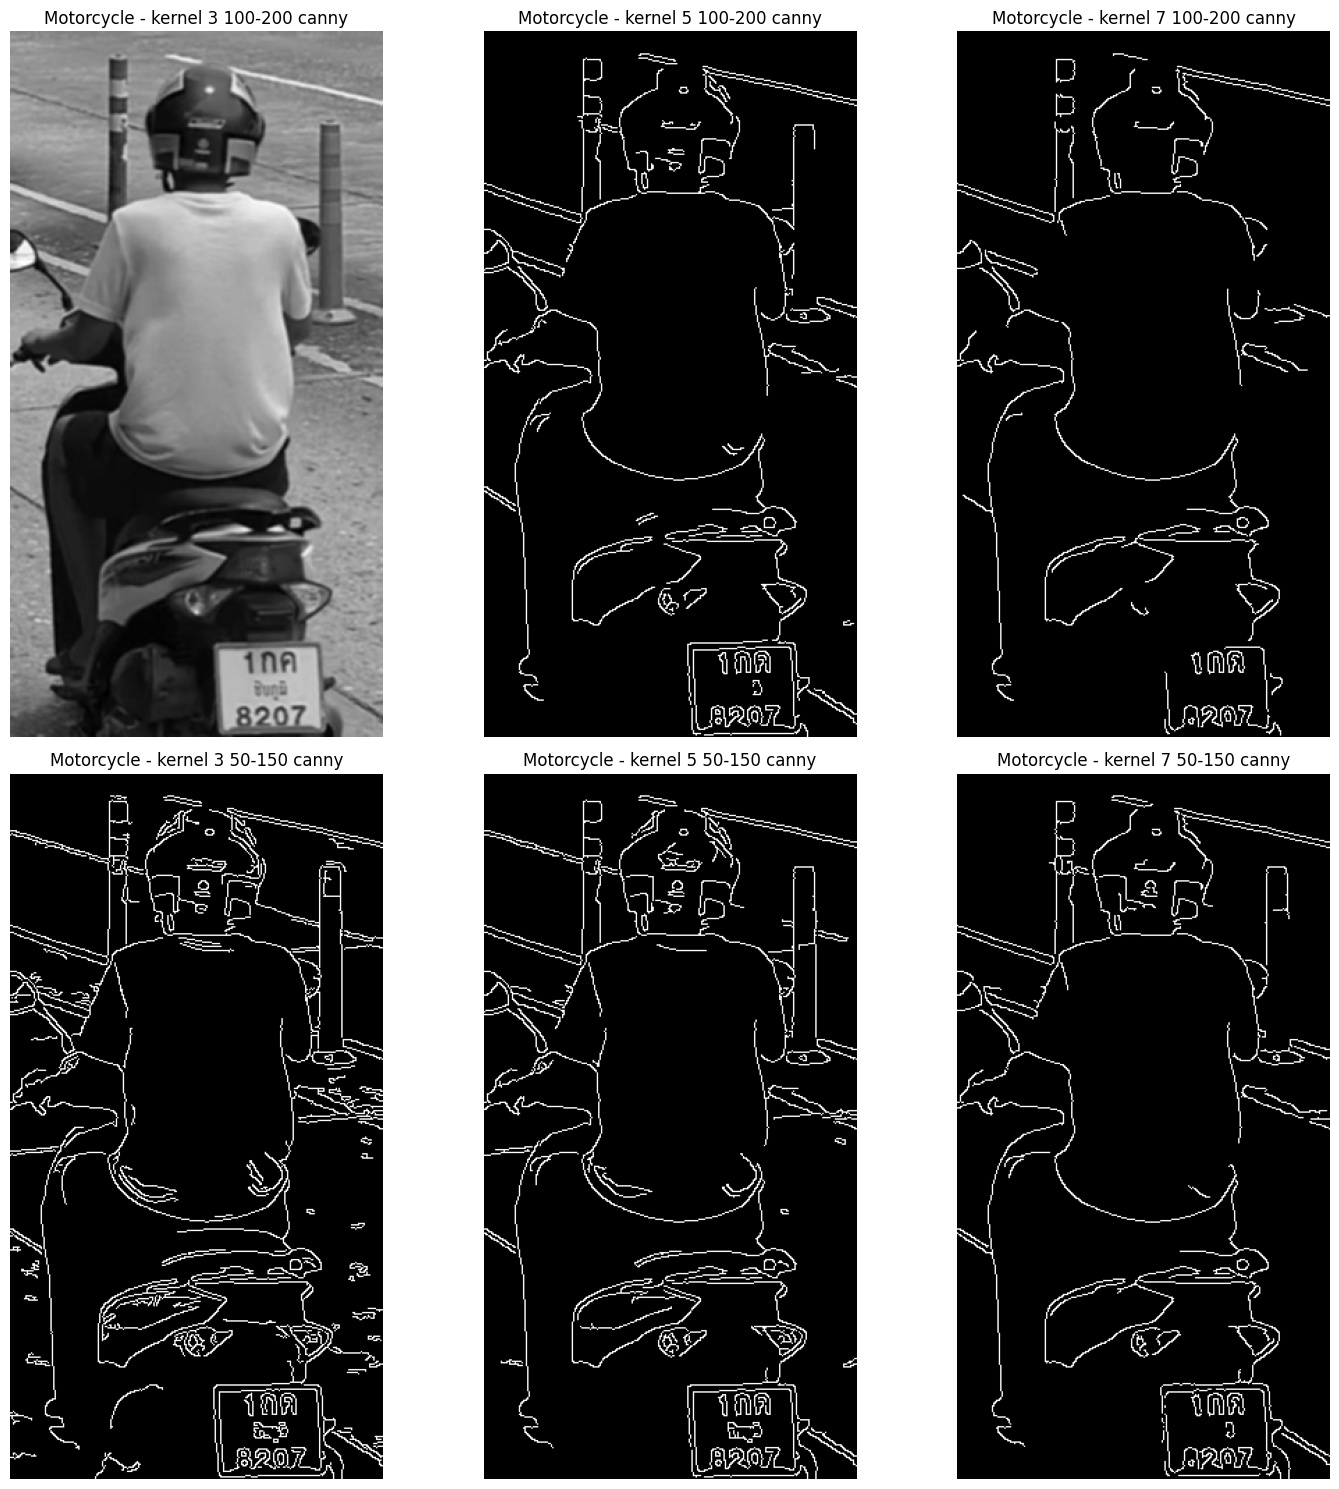

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]

def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=3):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return compute_contour_stats(contours), canny_image

kernel_image = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (3,3),0)),100, 200)
kernel_image1 = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (5,5),0)),100, 200)
kernel_image2 = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (7,7),0)),100, 200)

kernel_image3 = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (3,3),0)),50, 150)
kernel_image4 = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (5,5),0)),50, 150)
kernel_image5 = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (7,7),0)),50, 150)

# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(2, 3, figsize=(15, 15))
i=0
# Show thresholded image with contours
axes[0,0].imshow(kernel_image, cmap="gray")
axes[0,0].set_title(titles[i] + " - kernel 3 100-200 canny")
axes[0,0].axis("off")

# Show thresholded image with contours
axes[0,1].imshow(kernel_image1, cmap="gray")
axes[0,1].set_title(titles[i] + " - kernel 5 100-200 canny")
axes[0,1].axis("off")

# Show thresholded image with contours
axes[0,2].imshow(kernel_image2, cmap="gray")
axes[0,2].set_title(titles[i] + " - kernel 7 100-200 canny")
axes[0,2].axis("off")

axes[1,0].imshow(kernel_image3, cmap="gray")
axes[1,0].set_title(titles[i] + " - kernel 3 50-150 canny")
axes[1,0].axis("off")

axes[1,1].imshow(kernel_image4, cmap="gray")
axes[1,1].set_title(titles[i] + " - kernel 5 50-150 canny")
axes[1,1].axis("off")

axes[1,2].imshow(kernel_image5, cmap="gray")
axes[1,2].set_title(titles[i] + " - kernel 7 50-150 canny")
axes[1,2].axis("off")



# Display the plots
plt.tight_layout()
plt.show()

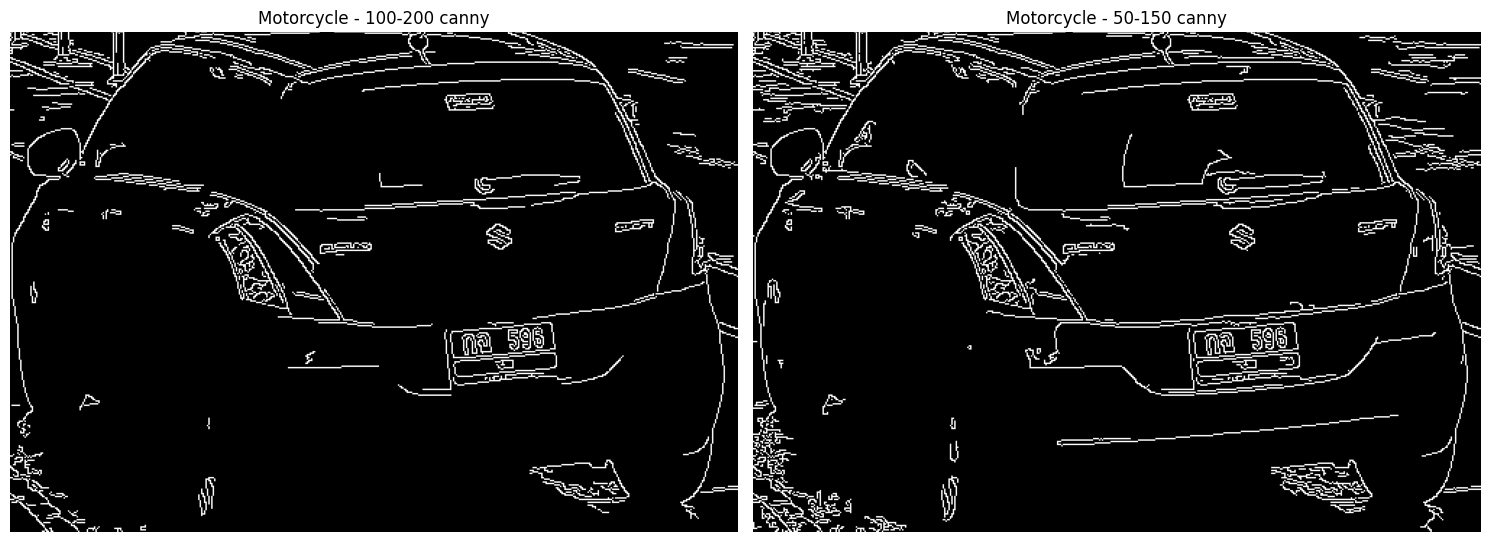

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_motorcycle1 = cv2.Canny(gray_motorcycle, 50, 150)

canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Apply thresholding
_, thresh_motorcycle = cv2.threshold(gray_motorcycle, 50, 255, cv2.THRESH_BINARY)
_, thresh_motorcycle1 = cv2.threshold(gray_motorcycle, 127, 255, cv2.THRESH_BINARY)
_, thresh_motorcycle2 = cv2.threshold(gray_motorcycle, 155, 255, cv2.THRESH_BINARY)


_, thresh_hatchback = cv2.threshold(gray_hatchback, 127, 255, cv2.THRESH_BINARY)
_, thresh_pickup = cv2.threshold(gray_pickup, 127, 255, cv2.THRESH_BINARY)
_, thresh_sedan = cv2.threshold(gray_sedan, 127, 255, cv2.THRESH_BINARY)
_, thresh_suv = cv2.threshold(gray_suv, 127, 255, cv2.THRESH_BINARY)

# Store threshold images in a list
thresh_images = [
    thresh_motorcycle,
    thresh_hatchback,
    thresh_pickup,
    thresh_sedan,
    thresh_suv,
]


# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]


# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(1, 2, figsize=(15, 15))
i=0
# Show thresholded image with contours
axes[0].imshow(canny_motorcycle, cmap="gray")
axes[0].set_title(titles[i] + " - 100-200 canny")
axes[0].axis("off")

# Show thresholded image with contours
axes[1].imshow(canny_motorcycle1, cmap="gray")
axes[1].set_title(titles[i] + " - 50-150 canny")
axes[1].axis("off")



# Display the plots
plt.tight_layout()
plt.show()

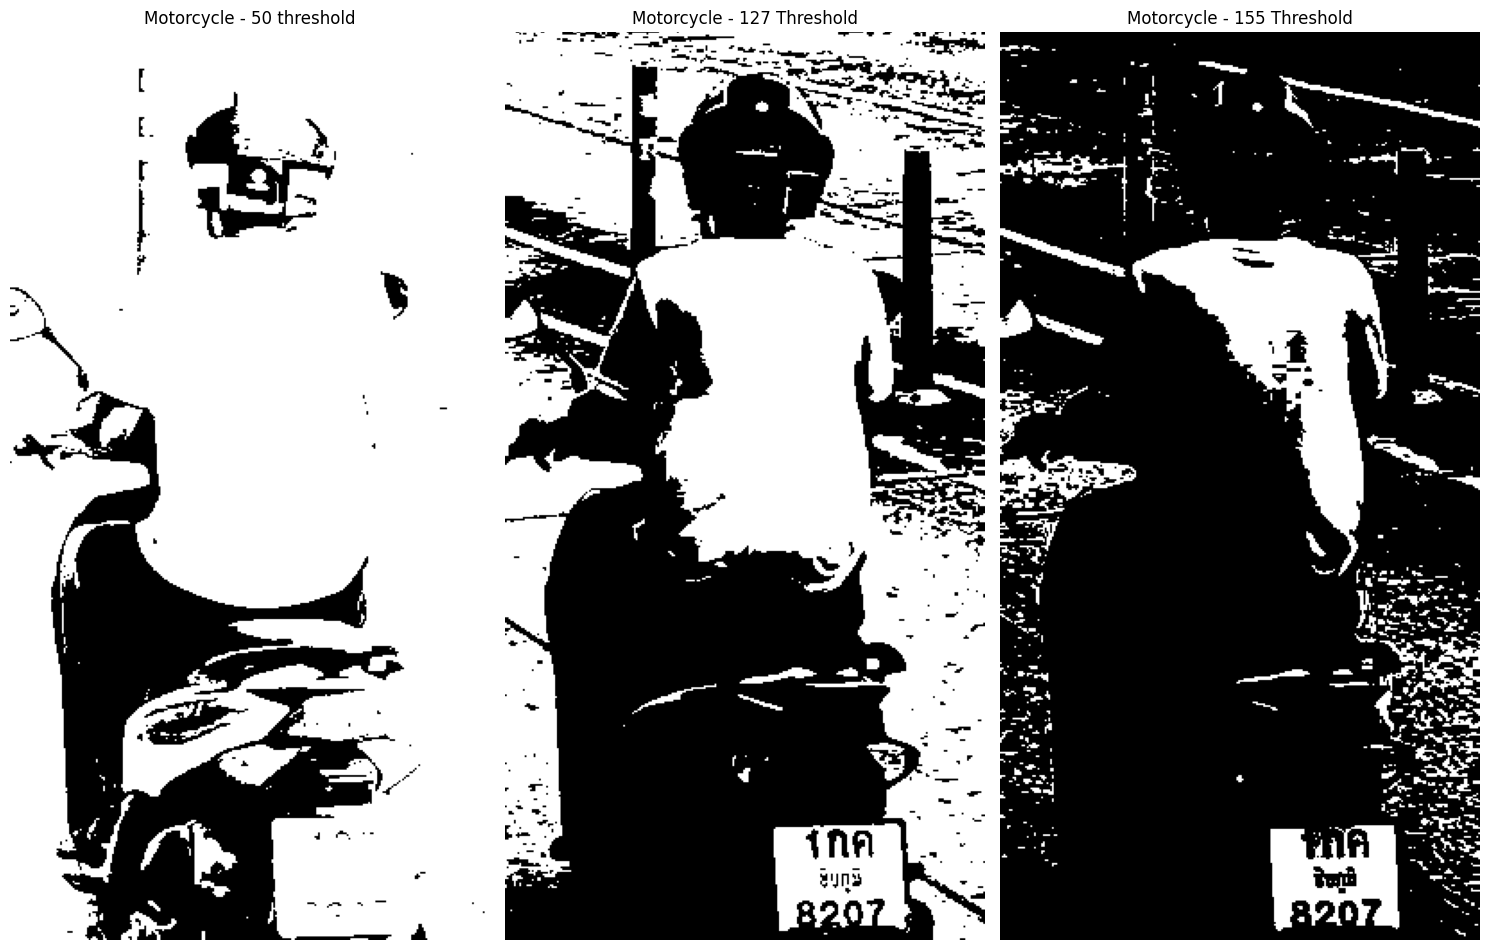

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_motorcycle1 = cv2.Canny(gray_motorcycle, 50, 150)

canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Apply thresholding
_, thresh_motorcycle = cv2.threshold(gray_motorcycle, 50, 255, cv2.THRESH_BINARY)
_, thresh_motorcycle1 = cv2.threshold(gray_motorcycle, 127, 255, cv2.THRESH_BINARY)
_, thresh_motorcycle2 = cv2.threshold(gray_motorcycle, 155, 255, cv2.THRESH_BINARY)


_, thresh_hatchback = cv2.threshold(gray_hatchback, 127, 255, cv2.THRESH_BINARY)
_, thresh_pickup = cv2.threshold(gray_pickup, 127, 255, cv2.THRESH_BINARY)
_, thresh_sedan = cv2.threshold(gray_sedan, 127, 255, cv2.THRESH_BINARY)
_, thresh_suv = cv2.threshold(gray_suv, 127, 255, cv2.THRESH_BINARY)

# Store threshold images in a list
thresh_images = [
    thresh_motorcycle,
    thresh_hatchback,
    thresh_pickup,
    thresh_sedan,
    thresh_suv,
]


# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]


# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
i=0
# Show thresholded image with contours
axes[0].imshow(thresh_motorcycle, cmap="gray")
axes[0].set_title(titles[i] + " - 50 threshold")
axes[0].axis("off")

# Show thresholded image with contours
axes[1].imshow(thresh_motorcycle1, cmap="gray")
axes[1].set_title(titles[i] + " - 127 Threshold")
axes[1].axis("off")

axes[2].imshow(thresh_motorcycle2, cmap="gray")
axes[2].set_title(titles[i] + " - 155 Threshold")
axes[2].axis("off")



# Display the plots
plt.tight_layout()
plt.show()

In [28]:
import os
import cv2

folder_paths = [
    "../data/vehicles/r7bthvstxw-1/hatchback",  
    "../data/vehicles/r7bthvstxw-1/motorcycle",  
    "../data/vehicles/r7bthvstxw-1/pickup",  
    "../data/vehicles/r7bthvstxw-1/sedan",  
    "../data/vehicles/r7bthvstxw-1/suv",  
]

# Fixed parameters for binary thresholding and Canny edge detection
threshold_value = 127  # fixed binary threshold value
canny_low_threshold = 100  # fixed low threshold for Canny edge detection
canny_high_threshold = 200  # fixed high threshold for Canny edge detection
kernel_size = 5  # fixed Gaussian blur kernel size

# Function to apply threshold and get statistics
def apply_threshold_and_compute_stats(image, thresh_value):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(
        thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), thresh_image

# Function to apply Canny and get statistics
def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=5):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(
        canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), canny_image

# Function to compute contour statistics
def compute_contour_stats(contours):
    num_contours = len(contours)
    total_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_perimeter = sum(cv2.arcLength(cnt, True) for cnt in contours)
    return num_contours, total_area, total_perimeter

# Function to process all images in a folder and compute average stats
def process_images_in_folder(folder_path):
    num_images = 0
    total_contours = 0
    total_area = 0
    total_perimeter = 0
    
    # Load and process each image in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            num_images += 1

            # Apply thresholding and Canny edge detection, compute stats
            stats_thresh, _ = apply_threshold_and_compute_stats(img, threshold_value)
            stats_canny, _ = apply_canny_and_compute_stats(img, canny_low_threshold, canny_high_threshold, kernel_size)

            # Combine stats (you could use either thresholding or Canny stats, but here we combine them)
            num_contours = stats_thresh[0]
            area = stats_thresh[1]
            perimeter = stats_thresh[2]

            # Accumulate stats
            total_contours += num_contours
            total_area += area
            total_perimeter += perimeter

    # Compute averages
    avg_contours = total_contours / num_images if num_images > 0 else 0
    avg_area = total_area / num_images if num_images > 0 else 0
    avg_perimeter = total_perimeter / num_images if num_images > 0 else 0

    return avg_contours, avg_area, avg_perimeter

# Process each folder and print average stats
for folder_path in folder_paths:
    folder_name = os.path.basename(folder_path)
    avg_contours, avg_area, avg_perimeter = process_images_in_folder(folder_path)
    print(f"Analysis for folder {folder_name}:")
    print(f"  Average Contours = {avg_contours:.2f}")
    print(f"  Average Area = {avg_area:.2f}")
    print(f"  Average Perimeter = {avg_perimeter:.2f}")
    print("\n")


Analysis for folder hatchback:
  Average Contours = 75.73
  Average Area = 25707.69
  Average Perimeter = 3873.60


Analysis for folder motorcycle:
  Average Contours = 128.08
  Average Area = 36159.36
  Average Perimeter = 5401.90


Analysis for folder pickup:
  Average Contours = 98.06
  Average Area = 19999.25
  Average Perimeter = 4475.44


Analysis for folder sedan:
  Average Contours = 78.82
  Average Area = 33023.74
  Average Perimeter = 4221.00


Analysis for folder suv:
  Average Contours = 95.81
  Average Area = 25571.32
  Average Perimeter = 4889.98




In [29]:
import os
import cv2

folder_paths = [
    "../data/vehicles/r7bthvstxw-1/hatchback",  
    "../data/vehicles/r7bthvstxw-1/motorcycle",  
    "../data/vehicles/r7bthvstxw-1/pickup",  
    "../data/vehicles/r7bthvstxw-1/sedan",  
    "../data/vehicles/r7bthvstxw-1/suv",  
]

# Fixed parameters for binary thresholding and Canny edge detection
threshold_value = 127  # fixed binary threshold value
canny_low_threshold = 100  # fixed low threshold for Canny edge detection
canny_high_threshold = 200  # fixed high threshold for Canny edge detection
kernel_size = 5  # fixed Gaussian blur kernel size

# Function to apply threshold and get statistics
def apply_threshold_and_compute_stats(image, thresh_value):
    _, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(
        thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), thresh_image

# Function to apply Canny and get statistics
def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=5):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(
        canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    return compute_contour_stats(contours), canny_image

# Function to compute contour statistics
def compute_contour_stats(contours):
    num_contours = len(contours)
    total_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_perimeter = sum(cv2.arcLength(cnt, True) for cnt in contours)
    return num_contours, total_area, total_perimeter

# Function to process all images in a folder and compute average stats
def process_images_in_folder(folder_path):
    num_images = 0
    total_contours = 0
    total_area = 0
    total_perimeter = 0
    
    # Load and process each image in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            num_images += 1

            # Apply thresholding and Canny edge detection, compute stats
            stats_thresh, _ = apply_threshold_and_compute_stats(img, threshold_value)
            stats_canny, _ = apply_canny_and_compute_stats(img, canny_low_threshold, canny_high_threshold, kernel_size)

            # Combine stats (you could use either thresholding or Canny stats, but here we combine them)
            num_contours = stats_canny[0]
            area = stats_canny[1]
            perimeter = stats_canny[2]

            # Accumulate stats
            total_contours += num_contours
            total_area += area
            total_perimeter += perimeter

    # Compute averages
    avg_contours = total_contours / num_images if num_images > 0 else 0
    avg_area = total_area / num_images if num_images > 0 else 0
    avg_perimeter = total_perimeter / num_images if num_images > 0 else 0

    return avg_contours, avg_area, avg_perimeter

# Process each folder and print average stats
for folder_path in folder_paths:
    folder_name = os.path.basename(folder_path)
    avg_contours, avg_area, avg_perimeter = process_images_in_folder(folder_path)
    print(f"Analysis for folder {folder_name}:")
    print(f"  Average Contours = {avg_contours:.2f}")
    print(f"  Average Area = {avg_area:.2f}")
    print(f"  Average Perimeter = {avg_perimeter:.2f}")
    print("\n")


Analysis for folder hatchback:
  Average Contours = 63.22
  Average Area = 3445.53
  Average Perimeter = 7748.94


Analysis for folder motorcycle:
  Average Contours = 88.70
  Average Area = 2159.87
  Average Perimeter = 8522.99


Analysis for folder pickup:
  Average Contours = 81.46
  Average Area = 3041.35
  Average Perimeter = 9297.59


Analysis for folder sedan:
  Average Contours = 64.64
  Average Area = 2567.45
  Average Perimeter = 8642.04


Analysis for folder suv:
  Average Contours = 78.94
  Average Area = 3180.19
  Average Perimeter = 10034.63




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_motorcycle1 = cv2.Canny(gray_motorcycle, 50, 150)

canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Apply thresholding
_, thresh_motorcycle = cv2.threshold(gray_motorcycle, 50, 255, cv2.THRESH_BINARY)
_, thresh_motorcycle1 = cv2.threshold(gray_motorcycle, 127, 255, cv2.THRESH_BINARY)
_, thresh_motorcycle2 = cv2.threshold(gray_motorcycle, 155, 255, cv2.THRESH_BINARY)


_, thresh_hatchback = cv2.threshold(gray_hatchback, 127, 255, cv2.THRESH_BINARY)
_, thresh_pickup = cv2.threshold(gray_pickup, 127, 255, cv2.THRESH_BINARY)
_, thresh_sedan = cv2.threshold(gray_sedan, 127, 255, cv2.THRESH_BINARY)
_, thresh_suv = cv2.threshold(gray_suv, 127, 255, cv2.THRESH_BINARY)

# Store threshold images in a list
thresh_images = [
    thresh_motorcycle,
    thresh_hatchback,
    thresh_pickup,
    thresh_sedan,
    thresh_suv,
]


# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]


# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

kernel_image = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (3,3),0)),100, 200)
kernel_image1 = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (5,5),0)),100, 200)
kernel_image2 = cv2.Canny((cv2.GaussianBlur(gray_motorcycle, (7,7),0)),100, 200)
# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
i=0
# Show thresholded image with contours
axes[0].imshow(kernel_image, cmap="gray")
axes[0].set_title(titles[i] + " - 50 threshold")
axes[0].axis("off")

# Show thresholded image with contours
axes[1].imshow(thresh_motorcycle1, cmap="gray")
axes[1].set_title(titles[i] + " - 127 Threshold")
axes[1].axis("off")

axes[2].imshow(thresh_motorcycle2, cmap="gray")
axes[2].set_title(titles[i] + " - 155 Threshold")
axes[2].axis("off")



# Display the plots
plt.tight_layout()
plt.show()

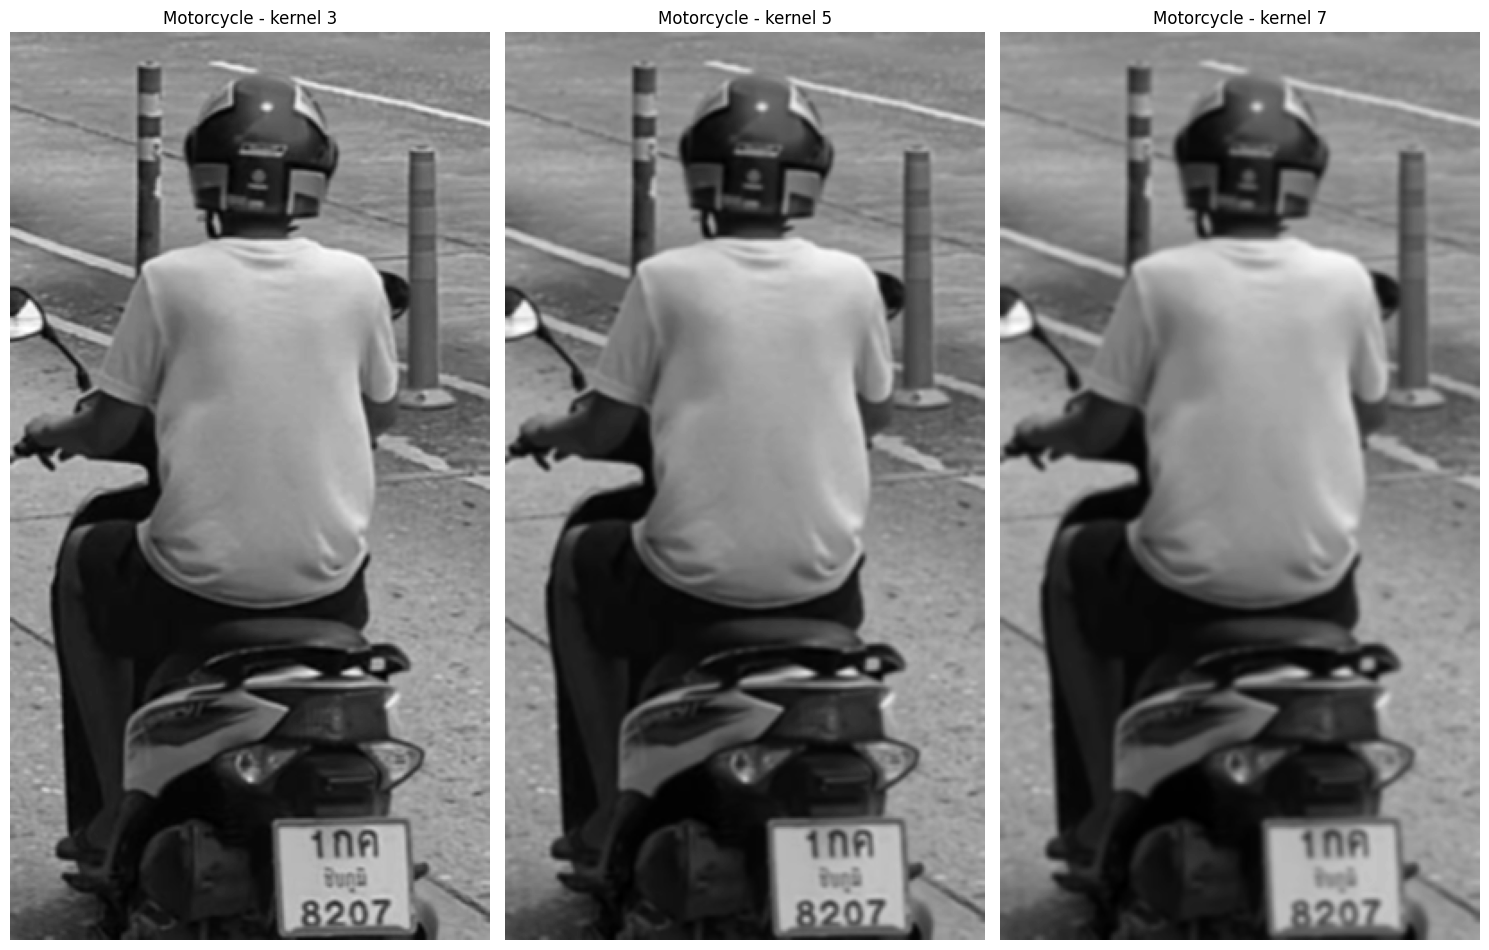

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]

def apply_canny_and_compute_stats(image, low_threshold, high_threshold, kernel_size=3):
    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    canny_image = cv2.Canny(blurred_image, low_threshold, high_threshold)
    contours, _ = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return compute_contour_stats(contours), canny_image

kernel_image = (cv2.GaussianBlur(gray_motorcycle, (3,3),0))
kernel_image1 = (cv2.GaussianBlur(gray_motorcycle, (5,5),0))
kernel_image2 = (cv2.GaussianBlur(gray_motorcycle, (7,7),0))

# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
i=0
# Show thresholded image with contours
axes[0].imshow(kernel_image, cmap="gray")
axes[0].set_title(titles[i] + " - kernel 3")
axes[0].axis("off")

# Show thresholded image with contours
axes[1].imshow(kernel_image1, cmap="gray")
axes[1].set_title(titles[i] + " - kernel 5")
axes[1].axis("off")

# Show thresholded image with contours
axes[2].imshow(kernel_image2, cmap="gray")
axes[2].set_title(titles[i] + " - kernel 7")
axes[2].axis("off")




# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

motorcycle = cv2.imread("../data/vehicles/r7bthvstxw-1/motorcycle/PIC_100.jpg")
hatchback = cv2.imread("../data/vehicles/r7bthvstxw-1/hatchback/PIC_100.jpg")
pickup = cv2.imread("../data/vehicles/r7bthvstxw-1/pickup/PIC_100.jpg")
sedan = cv2.imread("../data/vehicles/r7bthvstxw-1/sedan/PIC_100.jpg")
suv = cv2.imread("../data/vehicles/r7bthvstxw-1/suv/PIC_100.jpg")
images = [motorcycle, hatchback, pickup, sedan, suv]

# Convert images to grayscale
gray_motorcycle = cv2.cvtColor(motorcycle, cv2.COLOR_BGR2GRAY)
gray_hatchback = cv2.cvtColor(hatchback, cv2.COLOR_BGR2GRAY)
gray_pickup = cv2.cvtColor(pickup, cv2.COLOR_BGR2GRAY)
gray_sedan = cv2.cvtColor(sedan, cv2.COLOR_BGR2GRAY)
gray_suv = cv2.cvtColor(suv, cv2.COLOR_BGR2GRAY)

# Store grayscale images in a list
gray_images = [gray_motorcycle, gray_hatchback, gray_pickup, gray_sedan, gray_suv]
titles = ["Motorcycle", "Hatchback", "Pickup", "Sedan", "SUV"]


# Apply Canny edge detection
canny_motorcycle = cv2.Canny(gray_motorcycle, 100, 200)
canny_hatchback = cv2.Canny(gray_hatchback, 100, 200)
canny_pickup = cv2.Canny(gray_pickup, 100, 200)
canny_sedan = cv2.Canny(gray_sedan, 100, 200)
canny_suv = cv2.Canny(gray_suv, 100, 200)

# Store Canny edge images in a list
canny_images = [canny_motorcycle, canny_hatchback, canny_pickup, canny_sedan, canny_suv]

# Apply thresholding
_, thresh_motorcycle = cv2.threshold(gray_motorcycle, 127, 255, cv2.THRESH_BINARY)
_, thresh_hatchback = cv2.threshold(gray_hatchback, 127, 255, cv2.THRESH_BINARY)
_, thresh_pickup = cv2.threshold(gray_pickup, 127, 255, cv2.THRESH_BINARY)
_, thresh_sedan = cv2.threshold(gray_sedan, 127, 255, cv2.THRESH_BINARY)
_, thresh_suv = cv2.threshold(gray_suv, 127, 255, cv2.THRESH_BINARY)

# Store threshold images in a list
thresh_images = [
    thresh_motorcycle,
    thresh_hatchback,
    thresh_pickup,
    thresh_sedan,
    thresh_suv,
]


# Function to generate random colors
def random_color():
    return [random.randint(0, 255) for _ in range(3)]


# Create copies of original images to draw contours on them
contour_images_thresh = [img.copy() for img in images]
contour_images_canny = [img.copy() for img in images]

# Find and draw contours on thresholded images
for i in range(5):
    # Find contours in thresholded images
    contours_thresh, _ = cv2.findContours(
        thresh_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_thresh:
        color = random_color()
        cv2.drawContours(contour_images_thresh[i], [contour], -1, color, 2)

# Find and draw contours on Canny edge-detected images
for i in range(5):
    # Find contours in Canny images
    contours_canny, _ = cv2.findContours(
        canny_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Draw each contour with a different color
    for contour in contours_canny:
        color = random_color()
        cv2.drawContours(contour_images_canny[i], [contour], -1, color, 2)

# Visualize the results with contours

fig, axes = plt.subplots(5, 3, figsize=(15, 15))

for i in range(5):
    # Show original image
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(titles[i] + " - Original")
    axes[i, 0].axis("off")

    # Show thresholded image with contours
    axes[i, 1].imshow(cv2.cvtColor(contour_images_thresh[i], cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(titles[i] + " - Threshold Contours")
    axes[i, 1].axis("off")

    # Show Canny edge image with contours
    axes[i, 2].imshow(cv2.cvtColor(contour_images_canny[i], cv2.COLOR_BGR2RGB))
    axes[i, 2].set_title(titles[i] + " - Canny Contours")
    axes[i, 2].axis("off")

# Display the plots
plt.tight_layout()
plt.show()